<a href="https://colab.research.google.com/github/khbae/trading/blob/master/09_Ridge_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge and Lasso Regression:

* https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

* regularization techniques
    * minimizing the error between predicted and actual observations
    * penalizing the magnitude of coefficients of independent variables 
* creating parsimonious models in presence of a large number of independent variables.

**OLS Regression**
* Minimization objective =  sum of squared errors  

**Ridge Regression**
* Penalty equivalent to square of the magnitude of coefficients
* Minimization objective =  sum of squared errors + **$\alpha$ * (sum of square of coefficients)**

**Lasso Regression**
* Penalty equivalent to absolute value of the magnitude of coefficients
* Minimization objective = sum of squared errors + **$\alpha$ * (sum of absolute value of coefficients)**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

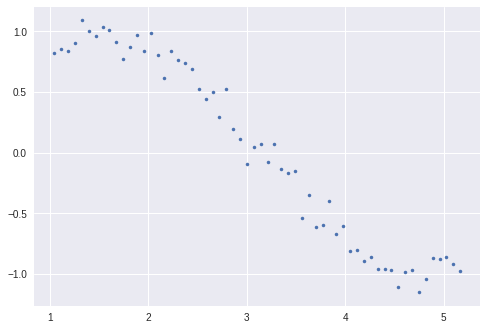

In [0]:
x1 = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(x1) + np.random.normal(0,0.1,len(x1))
data = pd.DataFrame(np.column_stack([y,x1]),columns=['y','x1'])
data.head()
plt.plot(data['x1'],data['y'],'.')

In [0]:
# create x**2, x**3, ..., x**d

for i in range(2,21):
  data['x%d'%i] = data['x1'] ** i

data.head()


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.823896,1.047198,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,...,1.660790,1.739176,1.821260,1.907219,1.997235,2.091500,2.190214,2.293586,2.401838,2.515199
1,0.851595,1.117011,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,...,3.377775,3.773011,4.214494,4.707635,5.258479,5.873777,6.561072,7.328788,8.186335,9.144223
2,0.839367,1.186824,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,...,6.580351,7.809718,9.268760,11.000386,13.055521,15.494604,18.389366,21.824939,25.902359,30.741539
3,0.904835,1.256637,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,...,12.339811,15.506664,19.486248,24.487142,30.771450,38.668544,48.592326,61.062918,76.733926,96.426695
4,1.090843,1.326450,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,...,22.366630,29.668222,39.353420,52.200353,69.241170,91.844966,121.827776,161.598482,214.352344,284.327717


In [0]:
# define independent
numind = 20;
indvar = ['x%d'%i for i in range(1,numind)]
print(indvar)


['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19']


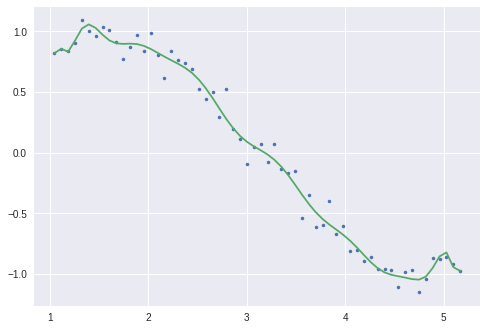

In [0]:
# OLS regression, LinearRegression
from sklearn import linear_model
ols1 = linear_model.LinearRegression(normalize=True)
ols1.fit(X=data[indvar],y=data['y'])
ols_pred = ols1.predict(X=data[indvar])
#print(ols_pred)
plt.plot(data['x1'],data['y'],'.')
plt.plot(data['x1'],ols_pred)

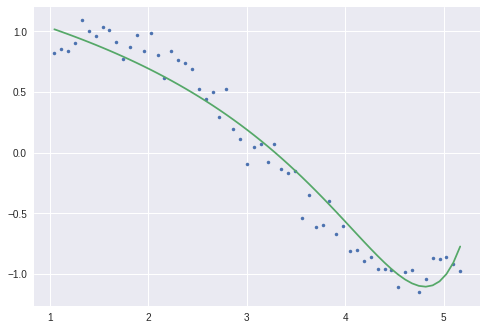

In [0]:
# Ridge Regression
rig1 = linear_model.Ridge(alpha=0.15,normalize=True)
rig1.fit(X=data[indvar],y=data['y'])
rig_pred = rig1.predict(X=data[indvar])
plt.plot(data['x1'],data['y'],'.')
plt.plot(data['x1'],rig_pred)

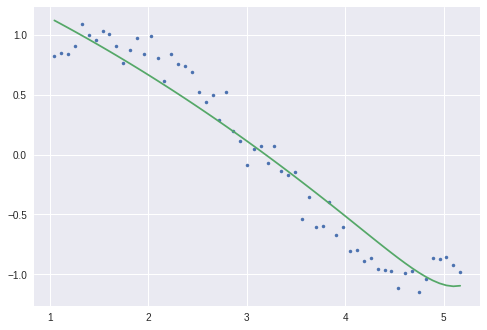

In [0]:
# Lasso Regression
las1 = linear_model.Lasso(alpha=0.005,normalize=True)
las1.fit(X=data[indvar],y=data['y'])
las_pred = las1.predict(X=data[indvar])
plt.plot(data['x1'],data['y'],'.')
plt.plot(data['x1'],las_pred)
